In [21]:
#Bibliotecas já instaladas no ambiente Python
import os
import time

import numpy as np
#Importar as funções que iremos utilizar do Selenium
from selenium import webdriver
#Importando BeautifulSoup
from bs4 import BeautifulSoup

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [9]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [10]:
from webdriver_manager.chrome import ChromeDriverManager

options = Options()
options.add_argument("--headless")
browser = webdriver.Chrome(ChromeDriverManager().install(),options=options)

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 94.0.4606
[WDM] - Get LATEST driver version for 94.0.4606
[WDM] - Driver [C:\Users\lucap\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache


In [11]:
#Atribuir ao Selenium o site que será acessado
browser.get('https://tempo.inmet.gov.br/TabelaEstacoes/')

#Recomendado para evitar ban do servidor
time.sleep(3)

#Selecionar em "Produto" a opção "Tabela de Dados das Estações" 
browser.find_element_by_xpath("//select/option[@value='TabelaEstacoes']").click()

In [12]:
from datetime import datetime

data_atual = datetime.today()
data_atual

datetime.datetime(2021, 10, 17, 23, 52, 39, 949735)

In [14]:
from datetime import datetime, timedelta
futuredate_end = datetime.now() + timedelta(days=1)
futuredate_end = datetime.strftime(futuredate_end,format="%d/%m/%Y")


DATA_INIT = datetime.strftime(datetime.now(),format="%d/%m/%Y")
DATA_END = futuredate_end

In [15]:
VALOR_ESTACAO='A001' #Porto Alegre - RS

# DATA_INIT = '12/10/2021'
# DATA_END = '13/10/2021'

#Selecionamos a opção de estação automática
browser.find_element_by_xpath("//select/option[@value='T']").click()

#Selecionamos qual estação estamos interessados
browser.find_element_by_xpath("//select/option[@value='"+VALOR_ESTACAO+"']").click()

#Primeiro limpados o formulário e então preenchemos com a data inicial que desejamos.

browser.find_element_by_id("datepicker_EstacoesTabela_Inicio").clear()
browser.find_element_by_id("datepicker_EstacoesTabela_Inicio").send_keys(DATA_INIT)

#O mesmo para a data final
browser.find_element_by_id("datepicker_EstacoesTabela_Fim").clear()
browser.find_element_by_id("datepicker_EstacoesTabela_Fim").send_keys(DATA_END)

#Por fim, clicamos em "gerar tabela"
browser.find_element_by_id("EstacoesTabela").click()

In [16]:
#Pedimos para o Selenium aguardar por alguns segundos até que a tabela seja gerada pelo site
WebDriverWait(browser, 10).until(EC.visibility_of_element_located((By.ID, "tabela")))

#atribuimos a estrutura atual do site para uma variável para que o BeautifulSoup possa fazer sua mágica!
page_source = browser.page_source

#"Limpamos" a estrutura do site com o BeautifulSoup 
soup = BeautifulSoup(page_source, 'lxml')

#Pede para retornar a tabela existente na tag "table"
table = soup.find('table')

In [17]:
import pandas as pd

#Converter a tabela html em Dataframe. 
#Definimos como separador decimal ',' e milhar '.'
df = pd.read_html(str(table), decimal=',', thousands='.')[0]
df=pd.DataFrame(df.to_records())

#Se preferir, também há como renomear o cabeçalho da planilha.

New_Names=['index','Date','Time','Temp_inst','Temp_max','Temp_min','Umi_Rinst','Umi_Rmax','Umi_Rmin','PtOrvalho_inst','PtOrvalho_max','PtOrvalh_min',
          'Pressão_inst','Pressão_max','Pressão_min','Vento_veloc','Vento_dir','Vento_raj','Rad','Precipt'
          ]

for n in  range(0,len(df.keys())):
    df = df.rename(columns={df.keys()[n]: New_Names[n]})

In [18]:
df['Date'] = df['Date'] +' '+ df['Time'].apply(lambda x: '{}:00:00'.format(int(x)/100))
df['Date'] = pd.to_datetime(df['Date'])
df.drop(['Time','index'],axis=1,inplace=True)
df.set_index(['Date'],inplace=True)

In [19]:
df

,Temp_inst,Temp_max,Temp_min,Umi_Rinst,Umi_Rmax,Umi_Rmin,PtOrvalho_inst,PtOrvalho_max,PtOrvalh_min,Pressão_inst,Pressão_max,Pressão_min,Vento_veloc,Vento_dir,Vento_raj,Rad,Precipt
Date,,,,,,,,,,,,,,,,,
2021-10-17 00:00:00,19.8,20.8,19.7,80.0,83.0,76.0,16.3,16.9,16.2,887.9,887.9,887.6,1.1,357.0,2.1,NaN,0.0
2021-10-17 01:00:00,19.8,20.1,19.1,82.0,84.0,80.0,16.7,16.9,16.0,888.0,888.0,887.9,1.5,2.0,2.3,NaN,0.0
2021-10-17 02:00:00,18.7,19.9,18.6,90.0,90.0,82.0,16.9,16.9,16.5,888.0,888.2,888.0,0.3,340.0,2.1,NaN,0.0
2021-10-17 03:00:00,19.1,19.1,18.5,90.0,90.0,88.0,17.3,17.4,16.7,887.5,888.0,887.4,0.9,110.0,1.3,NaN,0.0
2021-10-17 04:00:00,18.0,19.3,18.0,89.0,90.0,86.0,16.2,17.4,16.2,887.0,887.6,887.0,0.5,339.0,1.8,NaN,0.0
2021-10-17 05:00:00,17.8,18.2,17.4,92.0,93.0,89.0,16.6,16.7,16.1,886.4,887.0,886.4,0.6,247.0,1.4,NaN,0.0
2021-10-17 06:00:00,18.0,18.1,17.5,91.0,93.0,91.0,16.6,16.7,16.1,886.1,886.4,886.1,0.8,84.0,1.1,NaN,0.0
2021-10-17 07:00:00,17.8,18.2,17.2,91.0,93.0,90.0,16.3,16.8,15.9,886.1,886.2,886.1,0.6,49.0,1.0,NaN,0.0
2021-10-17 08:00:00,18.1,18.1,17.6,92.0,92.0,91.0,16.7,16.7,16.2,886.5,886.5,886.1,0.7,206.0,1.9,NaN,0.0


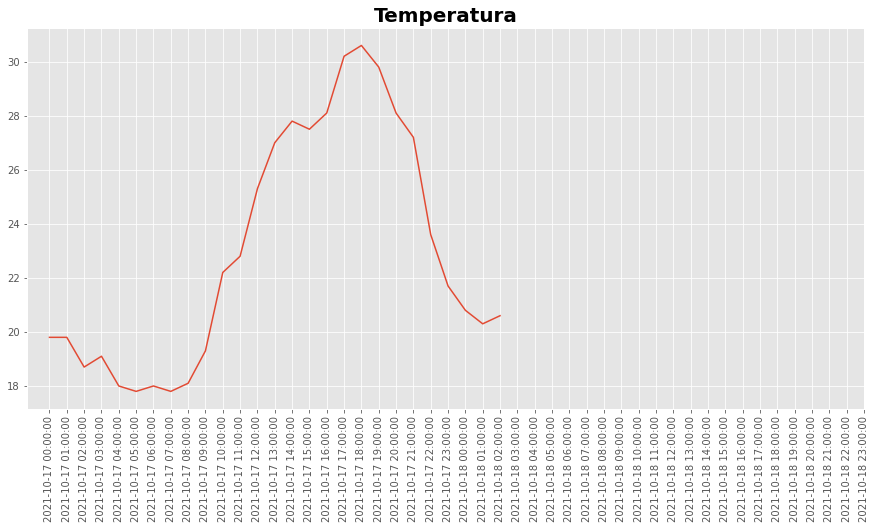

In [25]:
Y=df.Temp_inst.values
X=np.arange(len(df.index))
plt.subplots(figsize=(15,7))
plt.plot(X,Y)
plt.xticks(X,df.index,rotation=90)
plt.title('Temperatura',fontsize=20,fontweight='bold')

plt.show()

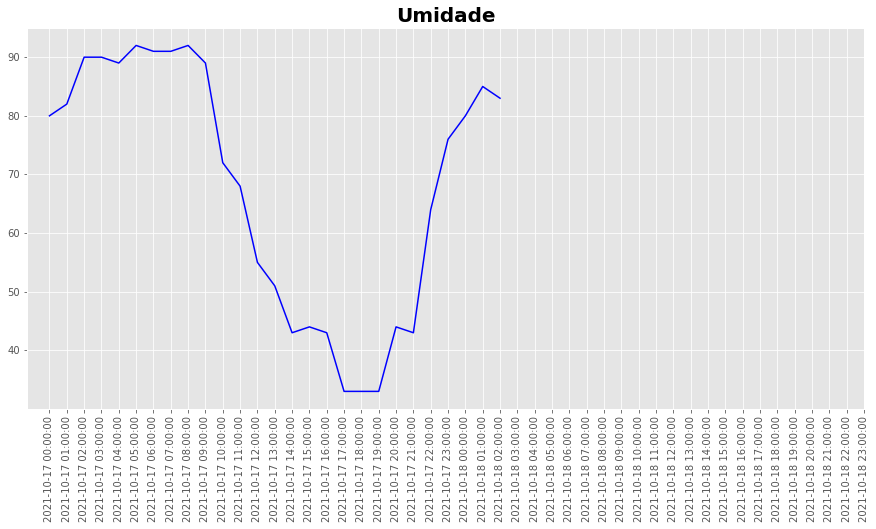

In [26]:
Y=df.Umi_Rinst.values
X=np.arange(len(df.index))
plt.subplots(figsize=(15,7))
plt.plot(X,Y,color='blue')
plt.xticks(X,df.index,rotation=90)
plt.title('Umidade',fontsize=20,fontweight='bold')

plt.show()

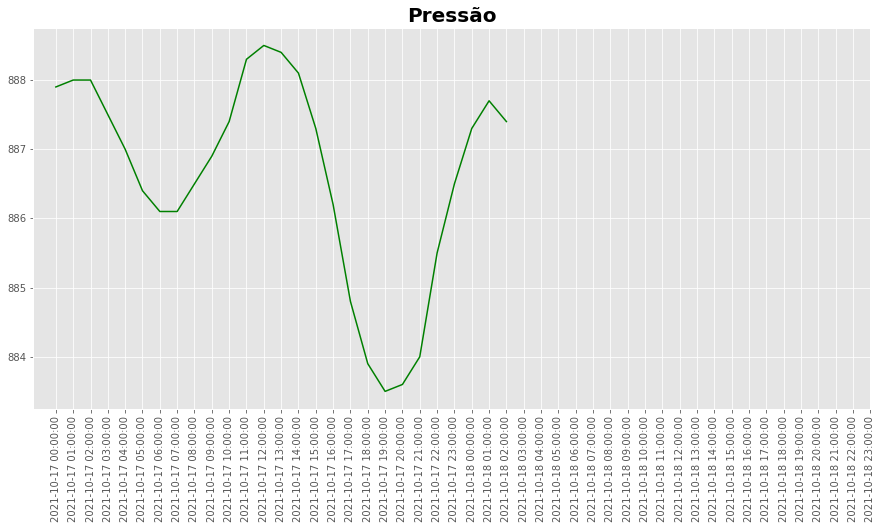

In [27]:
Y=df.Pressão_inst.values
X=np.arange(len(df.index))
plt.subplots(figsize=(15,7))
plt.plot(X,Y,color='green')
plt.xticks(X,df.index,rotation=90)
plt.title('Pressão',fontsize=20,fontweight='bold')
plt.show()